In [49]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
sql = create_engine("sqlite://",echo=False)
import sys
print(sys.executable)
from datetime import datetime
import datetime

/Users/yoo/opt/anaconda3/bin/python
CPU times: user 653 µs, sys: 196 µs, total: 849 µs
Wall time: 720 µs


In [20]:
pd.options.display.float_format = '{:5}'.format

In [6]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/reference/DataFrame/price.csv')
price.pop('Unnamed: 0')
price

,exchange,base_currency,open_price,high_price,low_price,close_price,krw_volume,base_volume,etime_date
0,Bithumb,BTC,5.099300e+07,5.160700e+07,4.985500e+07,5.148400e+07,1.118696e+11,2.193161e+03,2021-09-29
1,Bithumb,ETH,3.515000e+06,3.581000e+06,3.412000e+06,3.558000e+06,1.107814e+11,3.159023e+04,2021-09-29
2,Bithumb,LTC,1.778000e+05,1.788000e+05,1.710000e+05,1.788000e+05,1.379194e+10,7.825209e+04,2021-09-29
3,Bithumb,ETC,5.605000e+04,5.670000e+04,5.445000e+04,5.640000e+04,1.404224e+10,2.486184e+05,2021-09-29
4,Bithumb,XRP,1.127000e+03,1.129000e+03,1.082000e+03,1.125000e+03,8.224205e+10,7.355209e+07,2021-09-29
...,...,...,...,...,...,...,...,...,...
606,Gopax,MAPS,2.008000e-05,2.008000e-05,1.955000e-05,1.955000e-05,2.427652e-03,1.241766e+02,2021-09-28 13
607,Gopax,LED,1.029000e-05,1.029000e-05,9.000000e-06,9.010000e-06,1.205937e+00,1.338443e+05,2021-09-29 09
608,Gopax,LAND,4.000000e-08,5.000000e-08,4.000000e-08,5.000000e-08,5.744333e-02,1.148867e+06,2021-09-29 09
609,Gopax,BCHA,6.199990e-03,6.199990e-03,4.910240e-03,5.999010e-03,9.873131e-01,1.645793e+02,2021-09-29 09


In [22]:
# price.to_sql('crypto_price',sql)

In [28]:
upbit = price[price['exchange']=='Upbit']
upbit['etime_date'] = [i[:10] for i in upbit['etime_date']]
upbit

<ipython-input-28-86b938bf787b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upbit['etime_date'] = [i[:10] for i in upbit['etime_date']]


,exchange,base_currency,open_price,high_price,low_price,close_price,krw_volume,base_volume,etime_date
438,Upbit,ADA,2495.0,2620.0,2465.0,2605.0,1.072419e+11,4.221365e+07,2021-09-29
439,Upbit,AERGO,280.0,303.0,274.0,301.0,8.983486e+09,3.116772e+07,2021-09-29
440,Upbit,AHT,10.9,11.7,10.7,11.6,3.015147e+09,2.696417e+08,2021-09-29
441,Upbit,ANKR,90.8,96.9,89.4,94.8,5.397088e+09,5.770097e+07,2021-09-29
442,Upbit,AQT,3200.0,3460.0,3100.0,3425.0,6.451575e+09,1.969682e+06,2021-09-29
...,...,...,...,...,...,...,...,...,...
535,Upbit,XLM,314.0,330.0,311.0,327.0,1.389244e+10,4.321373e+07,2021-09-29
536,Upbit,XRP,1095.0,1150.0,1080.0,1145.0,2.968242e+11,2.656641e+08,2021-09-29
537,Upbit,XTZ,6730.0,7600.0,6550.0,7530.0,1.293933e+11,1.832804e+07,2021-09-29
538,Upbit,ZIL,92.2,97.0,91.0,96.9,3.826116e+09,4.044381e+07,2021-09-29


In [29]:
sql.execute("""
select date(etime_date) as basis_date, *
from crypto_price
where exchange = 'Upbit'
group by etime_date
""").fetchall()

OperationalError: (sqlite3.OperationalError) no such table: crypto_price
[SQL: 
select date(etime_date) as basis_date, *
from crypto_price
where exchange = 'Upbit'
group by etime_date
]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [42]:
upbit = upbit.set_index('base_currency')
upbit = upbit[['krw_volume']]
upbit

,krw_volume
base_currency,
ADA,107241858062.71613
AERGO,8983485875.606325
AHT,3015146639.4253016
ANKR,5397088049.96105
AQT,6451574881.257564
...,...
XLM,13892440491.720932
XRP,296824201013.8117
XTZ,129393277641.96805


In [65]:
index = np.arange(len(upbit.index))
label = upbit.index
label

Index(['ADA', 'AERGO', 'AHT', 'ANKR', 'AQT', 'ARDR', 'ARK', 'ATOM', 'AXS',
       'BAT',
       ...
       'UPP', 'VET', 'WAVES', 'WAXP', 'XEM', 'XLM', 'XRP', 'XTZ', 'ZIL',
       'ZRX'],
      dtype='object', name='base_currency', length=102)

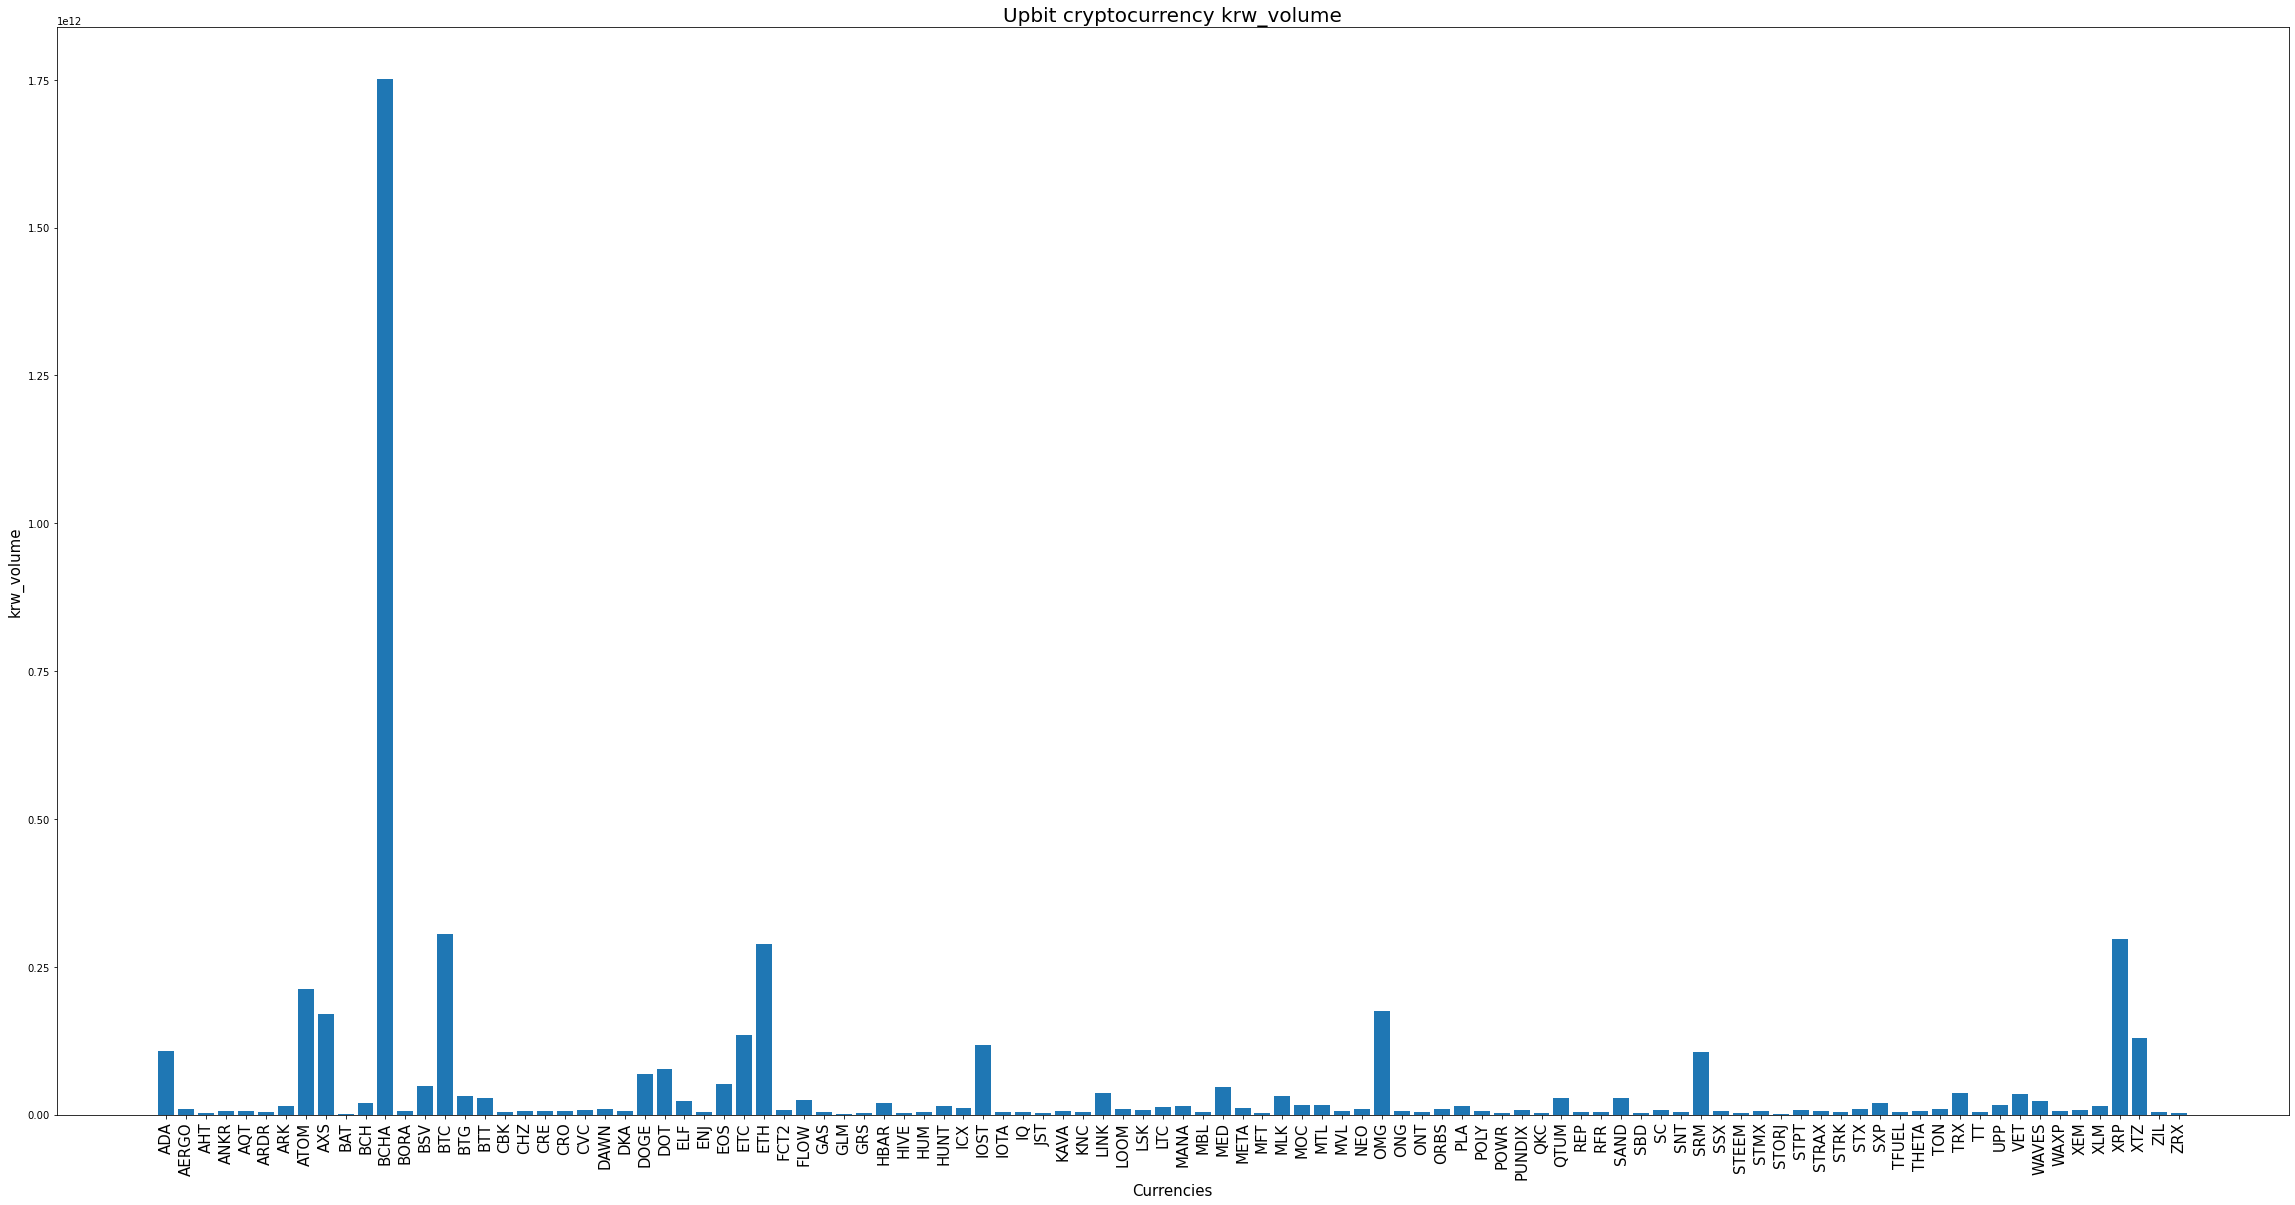

CPU times: user 1.68 s, sys: 507 ms, total: 2.19 s
Wall time: 2.23 s


In [95]:
%%time
plt.figure(figsize=(40,20))
plt.bar(index, upbit['krw_volume'])
plt.title("Upbit cryptocurrency krw_volume", fontsize=20)
plt.xlabel("Currencies", fontsize=15)
plt.ylabel("krw_volume", fontsize=15)
plt.xticks(index, labels, rotation=90, fontsize=15)
plt.show()

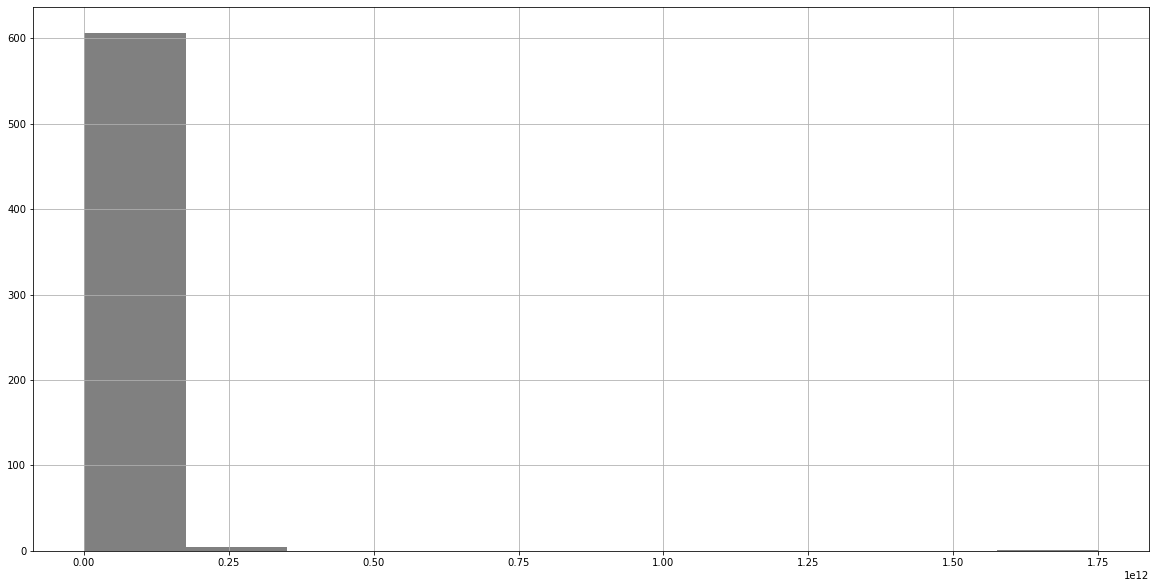

In [27]:
# Histogram

plt.figure(figsize=(20,10))
plt.hist(price['krw_volume'], bins=10, alpha=1, color='grey')
plt.grid()
plt.show()

In [46]:
upbit['etime_date'] = upbit['etime_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
upbit

<ipython-input-46-76707513de2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upbit['etime_date'] = upbit['etime_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


,exchange,base_currency,open_price,high_price,low_price,close_price,krw_volume,base_volume,etime_date
438,Upbit,ADA,2495.0,2620.0,2465.0,2605.0,1.072419e+11,4.221365e+07,2021-09-29
439,Upbit,AERGO,280.0,303.0,274.0,301.0,8.983486e+09,3.116772e+07,2021-09-29
440,Upbit,AHT,10.9,11.7,10.7,11.6,3.015147e+09,2.696417e+08,2021-09-29
441,Upbit,ANKR,90.8,96.9,89.4,94.8,5.397088e+09,5.770097e+07,2021-09-29
442,Upbit,AQT,3200.0,3460.0,3100.0,3425.0,6.451575e+09,1.969682e+06,2021-09-29
...,...,...,...,...,...,...,...,...,...
535,Upbit,XLM,314.0,330.0,311.0,327.0,1.389244e+10,4.321373e+07,2021-09-29
536,Upbit,XRP,1095.0,1150.0,1080.0,1145.0,2.968242e+11,2.656641e+08,2021-09-29
537,Upbit,XTZ,6730.0,7600.0,6550.0,7530.0,1.293933e+11,1.832804e+07,2021-09-29
538,Upbit,ZIL,92.2,97.0,91.0,96.9,3.826116e+09,4.044381e+07,2021-09-29


In [74]:
for i in upbit['etime_date']:
    if i > '2021-09-29':
        print("just error")
    else:
        print("correct")

TypeError: '>' not supported between instances of 'Timestamp' and 'str'